# **The Age of Recommender Systems**

The rapid growth of data collection has led to a new era of information. Data is being used to create more efficient systems and this is where Recommendation Systems come into play.  Recommendation Systems are a type of **information filtering systems** as they improve the quality of search results and provides items that are more relevant to the search item or are realted to the search history of the user.  


# 推荐系统红红火火

数据收集的快速增长引领了一个信息的新时代。数据被用于创建更高效的系统，这就是推荐系统发挥作用的地方。推荐系统是一种信息过滤系统，它们提高了搜索结果的质量，并提供与搜索项相关或与用户的搜索历史相关的物品。

They are used to predict the **rating** or **preference** that a user would give to an item. Almost every major tech company has applied them in some form or the other: Amazon uses it to suggest products to customers, YouTube uses it to decide which video to play next on autoplay, and Facebook uses it to recommend pages to like and people to follow. 
Moreover,  companies like Netflix and Spotify  depend highly on the effectiveness of their recommendation engines for their business and sucees.

它们被用来预测用户对物品的评分或偏好。几乎每个主要的科技公司都以某种形式应用了它们：亚马逊用它来向客户推荐产品，YouTube用它来决定自动播放下一个视频，Facebook用它来推荐喜欢的页面和关注的人。
此外，像Netflix和Spotify这样的公司在他们的推荐引擎的有效性上高度依赖，这对他们的业务和成功至关重要。但是，如果这些推荐系统开始疯狂地向你推荐一些奇怪的东西，也许是时候考虑给它们来个小小的“推荐系统教育”了。

![](https://i.kinja-img.com/gawker-media/image/upload/s--e3_2HgIC--/c_scale,f_auto,fl_progressive,q_80,w_800/1259003599478673704.jpg)

In this kernel we'll be building a baseline Movie Recommendation System using [TMDB 5000 Movie Dataset](https://www.kaggle.com/tmdb/tmdb-movie-metadata). For novices like me this kernel will pretty much serve as a foundation in recommendation systems and will provide you with something to start with. 

在这个内核中，我们将使用TMDB 5000电影数据集构建一个基准电影推荐系统。对于像我这样的新手来说，这个内核基本上就是推荐系统的基础，会给你提供一个起点。所以，让我们开始吧，就像电影中的英雄们一样，让我们一起探索电影的奇妙世界！

**So let's go!**

There are basically three types of recommender systems:-

> *  **Demographic Filtering**- They offer generalized recommendations to every user, based on movie popularity and/or genre. The System recommends the same movies to users with similar demographic features. Since each user is different , this approach is considered to be too simple. The basic idea behind this system is that movies that are more popular and critically acclaimed will have a higher probability of being liked by the average audience.



**基于人口统计的过滤** - 它们为每个用户提供普遍化的推荐，基于电影的流行度和/或类型。系统会根据用户的人口统计特征向相似的用户推荐相同的电影。因为每个用户都是不同的，所以这种方法被认为太简单了。这个系统的基本思想是，更受欢迎和广受好评的电影更有可能被普通观众喜欢。嗯，就好像是说，“嘿，你是一个喜欢动作片的30岁男性？那么，这就是我们推荐给每个其他30岁男性的相同动作片！”但是，让我们真实一点，我们每个人都是独特的个体，有着自己的癖好和口味。仅仅因为一部电影受欢迎或备受赞誉，并不意味着它就自动符合我们的口味。这就好像假设因为别人都喜欢披萨，我们就应该每餐都吃披萨一样。是时候加点料，探索更个性化的推荐系统了，你不觉得吗？

> *  **Content Based Filtering**- They suggest similar items based on a particular item. This system uses item metadata, such as genre, director, description, actors, etc. for movies, to make these recommendations. The general idea behind these recommender systems is that if a person liked a particular item, he or she will also like an item that is similar to it.

**基于内容的过滤** - 它们根据特定的物品推荐类似的物品。这个系统使用物品的元数据，比如类型、导演、描述、演员等等，来进行推荐。这些推荐系统的基本思想是，如果一个人喜欢某个特定的物品，他或她也会喜欢类似的物品。嘿，就好像是说，如果你喜欢一部电影，那么你很可能也会喜欢和它相似的电影。就像是你喜欢吃披萨，你也会喜欢吃意大利面一样。这个系统就是要帮你找到那些和你喜欢的物品类似的东西，让你的电影观影体验更加丰富多样。所以，让我们继续探索这个神奇的推荐系统吧！

> *  **Collaborative Filtering**- This system matches persons with similar interests and provides recommendations based on this matching. Collaborative filters do not require item metadata like its content-based counterparts.

**协同过滤** - - 这个系统会将兴趣相似的人匹配起来，并根据这种匹配提供推荐。与基于内容的过滤相比，协同过滤不需要物品的元数据。嘿，这就像是说，这个系统会找到和你兴趣相投的人，然后根据他们的喜好给你推荐。就像是你和一个志同道合的朋友一起探索电影世界，他会告诉你，嘿，这部电影真的很棒，你一定会喜欢的。而且，这个系统不需要知道电影的具体内容，只需要知道你和其他人的兴趣相似程度就可以啦。所以，让我们继续和这个神奇的系统一起合作，找到那些和我们兴趣相投的朋友吧！

Let's load the data now.

In [3]:
import pandas as pd 
import numpy as np 
df1=pd.read_csv(r'.\input\tmdb_5000_credits.csv')
df2=pd.read_csv(r'.\input\tmdb_5000_movies.csv')

The first dataset contains the following features:-

* movie_id - A unique identifier for each movie.
* cast - The name of lead and supporting actors.
* crew - The name of Director, Editor, Composer, Writer etc.

The second dataset has the following features:- 

* budget - The budget in which the movie was made.
* genre - The genre of the movie, Action, Comedy ,Thriller etc.
* homepage - A link to the homepage of the movie.
* id - This is infact the movie_id as in the first dataset.
* keywords - The keywords or tags related to the movie.
* original_language - The language in which the movie was made.
* original_title - The title of the movie before translation or adaptation.
* overview - A brief description of the movie.
* popularity - A numeric quantity specifying the movie popularity.
* production_companies - The production house of the movie.
* production_countries - The country in which it was produced.
* release_date - The date on which it was released.
* revenue - The worldwide revenue generated by the movie.
* runtime - The running time of the movie in minutes.
* status - "Released" or "Rumored".
* tagline - Movie's tagline.
* title - Title of the movie.
* vote_average -  average ratings the movie recieved.
* vote_count - the count of votes recieved.

Let's join the two dataset on the 'id' column


第一个数据集包含以下特征：-

* 电影ID - 每部电影的唯一标识符。
* 演员 - 主演和配角的姓名。
* 剧组 - 导演、编辑、作曲家、编剧等的姓名。

第二个数据集具有以下特征：-

* 预算 - 电影制作的预算。
* 类型 - 电影的类型，动作片、喜剧片、惊悚片等等。
* 主页 - 电影主页的链接。
* ID - 实际上就是第一个数据集中的电影ID。
* 关键词 - 与电影相关的关键词或标签。
* 原始语言 - 电影的制作语言。
* 原始标题 - 在翻译或改编之前的电影标题。
* 概述 - 电影的简要描述。
* 受欢迎程度 - 一个数值表示电影的受欢迎程度。
* 制作公司 - 电影的制作公司。
* 制作国家 - 电影的制作国家。
* 发布日期 - 电影的上映日期。
* 收入 - 电影在全球范围内的收入。
* 片长 - 电影的播放时长，以分钟为单位。
* 状态 - "已发布"或"谣言"。
* 口号 - 电影的口号。
* 标题 - 电影的标题。
* 平均评分 - 电影的平均评分。
* 投票数 - 电影收到的投票数。

让我们根据'id'列将这两个数据集合并起来吧！

In [20]:
df1.columns = ['id','tittle','cast','crew']
df2= df2.merge(df1,on='id')

Just a peak at our data.

In [22]:
df1.head(5)

,id,tittle,cast,crew
0,19995,Avatar,"[{""cast_id"": 242, ""character"": ""Jake Sully"", ""...","[{""credit_id"": ""52fe48009251416c750aca23"", ""de..."
1,285,Pirates of the Caribbean: At World's End,"[{""cast_id"": 4, ""character"": ""Captain Jack Spa...","[{""credit_id"": ""52fe4232c3a36847f800b579"", ""de..."
2,206647,Spectre,"[{""cast_id"": 1, ""character"": ""James Bond"", ""cr...","[{""credit_id"": ""54805967c3a36829b5002c41"", ""de..."
3,49026,The Dark Knight Rises,"[{""cast_id"": 2, ""character"": ""Bruce Wayne / Ba...","[{""credit_id"": ""52fe4781c3a36847f81398c3"", ""de..."
4,49529,John Carter,"[{""cast_id"": 5, ""character"": ""John Carter"", ""c...","[{""credit_id"": ""52fe479ac3a36847f813eaa3"", ""de..."


In [21]:
df2.head(5)

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,...,runtime,spoken_languages,status,tagline,title,vote_average,vote_count,tittle,cast,crew
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...",...,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800,Avatar,"[{""cast_id"": 242, ""character"": ""Jake Sully"", ""...","[{""credit_id"": ""52fe48009251416c750aca23"", ""de..."
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",http://disney.go.com/disneypictures/pirates/,285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...",...,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500,Pirates of the Caribbean: At World's End,"[{""cast_id"": 4, ""character"": ""Captain Jack Spa...","[{""credit_id"": ""52fe4232c3a36847f800b579"", ""de..."
2,245000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.sonypictures.com/movies/spectre/,206647,"[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...",en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...",...,148.0,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Released,A Plan No One Escapes,Spectre,6.3,4466,Spectre,"[{""cast_id"": 1, ""character"": ""James Bond"", ""cr...","[{""credit_id"": ""54805967c3a36829b5002c41"", ""de..."
3,250000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",http://www.thedarkknightrises.com/,49026,"[{""id"": 849, ""name"": ""dc comics""}, {""id"": 853,...",en,The Dark Knight Rises,Following the death of District Attorney Harve...,112.312950,"[{""name"": ""Legendary Pictures"", ""id"": 923}, {""...",...,165.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,The Legend Ends,The Dark Knight Rises,7.6,9106,The Dark Knight Rises,"[{""cast_id"": 2, ""character"": ""Bruce Wayne / Ba...","[{""credit_id"": ""52fe4781c3a36847f81398c3"", ""de..."
4,260000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://movies.disney.com/john-carter,49529,"[{""id"": 818, ""name"": ""based on novel""}, {""id"":...",en,John Carter,"John Carter is a war-weary, former military ca...",43.926995,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}]",...,132.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"Lost in our world, found in another.",John Carter,6.1,2124,John Carter,"[{""cast_id"": 5, ""character"": ""John Carter"", ""c...","[{""credit_id"": ""52fe479ac3a36847f813eaa3"", ""de..."


# **Demographic Filtering** -
   Before getting started with this  -
* we need a metric to score or rate movie 
* Calculate the score for every movie 
* Sort the scores and recommend the best rated movie to the users.

We can use the average ratings of the movie as the score but using this won't be fair enough since a movie with 8.9 average rating and only 3 votes cannot be considered better than the movie with 7.8 as as average rating but 40 votes.
So, I'll be using IMDB's weighted rating (wr) which is given as :-

![](https://image.ibb.co/jYWZp9/wr.png)
where,
* v is the number of votes for the movie;
* m is the minimum votes required to be listed in the chart;
* R is the average rating of the movie; And
* C is the mean vote across the whole report

We already have v(**vote_count**) and R (**vote_average**) and C can be calculated as 

**人口统计过滤** - 在开始之前，我们需要一个评分指标来评价电影，然后计算每部电影的评分，最后按照评分排序，向用户推荐评分最高的电影。

我们可以使用电影的平均评分作为评分指标，但仅仅使用这个指标可能不够公平，因为一部平均评分为8.9但只有3个投票的电影，不能被认为比一部平均评分为7.8但有40个投票的电影更好。所以，我将使用IMDB的加权评分（wr），它的计算公式如下：

![](https://image.ibb.co/jYWZp9/wr.png)其中，* v是电影的投票数；* m是被列入排行榜所需的最低投票数；* R是电影的平均评分；而* C是整个报告中的平均投票数。嗯，就像是说，我们需要考虑投票数和平均评分的权衡。我们不能仅仅因为一个电影的评分高就认为它就是最好的，我们还需要考虑投票数，以确保评分的可靠性。所以，让我们用这个神奇的加权评分公式来找到最好的电影吧！

In [23]:
C= df2['vote_average'].mean()
C

6.092171559442016

So, the mean rating for all the movies is approx 6 on a scale of 10.The next step is to determine an appropriate value for m, the minimum votes required to be listed in the chart. We will use 90th percentile as our cutoff. In other words, for a movie to feature in the charts, it must have more votes than at least 90% of the movies in the list.

所以，所有电影的平均评分大约是6分（满分10分）。下一步是确定适当的m值，即在图表中列出所需的最低投票数。我们将使用第90百分位数作为我们的截断点。换句话说，为了在排行榜上出现，一部电影必须比列表中至少90%的电影拥有更多的投票数。嘿，就好像是说，我们要找到那些被大多数人认可的电影，而不是只有少数人喜欢的电影。所以，让我们用这个神奇的90百分位数来筛选出最受欢迎的电影吧！

In [24]:
m= df2['vote_count'].quantile(0.9)
m

1838.4000000000015

Now, we can filter out the movies that qualify for the chart 

In [25]:
q_movies = df2.copy().loc[df2['vote_count'] >= m]
q_movies.shape

(481, 23)

We see that there are 481 movies which qualify to be in this list. Now, we need to calculate our metric for each qualified movie. To do this, we will define a function, **weighted_rating()** and define a new feature **score**, of which we'll calculate the value by applying this function to our DataFrame of qualified movies:

我们看到有481部电影符合排行榜的条件。现在，我们需要为每个符合条件的电影计算我们的评分指标。为了做到这一点，我们将定义一个名为**weighted_rating()**的函数，并定义一个名为 **score** 的新特征，我们将通过将这个函数应用于我们的符合条件的电影数据框来计算它的值。嘿，就像是说，我们要为每部电影计算一个特殊的分数，这个分数将考虑到电影的评分、投票数和平均投票数。这样，我们就能找到那些真正值得一看的电影啦！所以，让我们用这个神奇的函数来计算每部电影的分数吧！

In [28]:
def weighted_rating(x, m=m, C=C):
    v = x['vote_count']
    R = x['vote_average']
    # Calculation based on the IMDB formula
    return (v/(v+m) * R) + (m/(m+v) * C)

In [29]:
# Define a new feature 'score' and calculate its value with `weighted_rating()`
q_movies['score'] = q_movies.apply(weighted_rating, axis=1)

Finally, let's sort the DataFrame based on the score feature and output the title, vote count, vote average and weighted rating or score of the top 10 movies.

In [30]:
#Sort movies based on score calculated above
q_movies = q_movies.sort_values('score', ascending=False)

#Print the top 15 movies
q_movies[['title', 'vote_count', 'vote_average', 'score']].head(10)

,title,vote_count,vote_average,score
1881,The Shawshank Redemption,8205,8.5,8.059258
662,Fight Club,9413,8.3,7.939256
65,The Dark Knight,12002,8.2,7.920020
3232,Pulp Fiction,8428,8.3,7.904645
96,Inception,13752,8.1,7.863239
3337,The Godfather,5893,8.4,7.851236
95,Interstellar,10867,8.1,7.809479
809,Forrest Gump,7927,8.2,7.803188
329,The Lord of the Rings: The Return of the King,8064,8.1,7.727243
1990,The Empire Strikes Back,5879,8.2,7.697884


Hurray! We have made our first(though very basic) recommender.
Under the **Trending Now** tab of these systems we find movies that are very popular and they can just be obtained by sorting the dataset by the popularity column.

哇哦！我们已经制作出了我们的第一个（虽然非常基础）推荐系统。
在这些系统的**时下流行**选项卡下，我们可以找到非常受欢迎的电影，只需按照流行度列对数据集进行排序就可以获得它们。嘿，就像是说，我们只需要看一下哪些电影最受欢迎，然后就可以知道哪些电影是时下的热门之选了。所以，让我们按照流行度来找到那些炙手可热的电影吧！

Text(0.5, 1.0, 'Popular Movies')

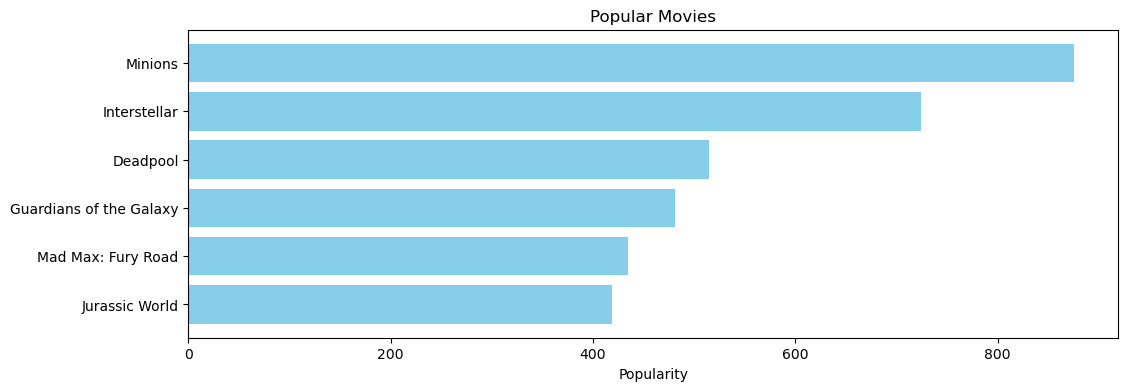

In [31]:
pop= df2.sort_values('popularity', ascending=False)
import matplotlib.pyplot as plt
plt.figure(figsize=(12,4))

plt.barh(pop['title'].head(6),pop['popularity'].head(6), align='center',
        color='skyblue')
plt.gca().invert_yaxis()
plt.xlabel("Popularity")
plt.title("Popular Movies")


Now something to keep in mind is that these demographic recommender provide a general chart of recommended movies to all the users. They are not sensitive to the interests and tastes of a particular user.
This is when we move on to a more refined system-  Content Basesd Filtering. 

现在要记住的是，这些人口统计推荐系统为所有用户提供了一份推荐电影的普遍榜单。它们并不敏感于特定用户的兴趣和口味。
这就是我们进一步推进到一个更精细的系统 - 基于内容的过滤的时候了。嘿，就好像是说，我们需要一个更高级的系统来根据用户的兴趣和喜好来推荐电影。所以，让我们进入基于内容的过滤系统的世界吧！

# **Content Based Filtering**
In this recommender system the content of the movie (overview, cast, crew, keyword, tagline etc) is used to find its similarity with other movies. Then the movies that are most likely to be similar are recommended.

![](https://image.ibb.co/f6mDXU/conten.png)

在这个推荐系统中，电影的内容（概述、演员、剧组、关键词、口号等）被用来找到它与其他电影的相似性。然后，我们会推荐那些最有可能相似的电影。嘿，就像是说，我们会把电影的内容放在一起，看看它们有没有什么共同点，然后找到那些最有可能相似的电影，给你推荐出来。所以，让我们进入这个神奇的基于内容的过滤系统的世界吧！

## **Plot description based Recommender**

We will compute pairwise similarity scores for all movies based on their plot descriptions and recommend movies based on that similarity score. The plot description is given in the **overview** feature of our dataset. 
Let's take a look at the data. .. 

我们将根据电影的剧情描述计算每对电影之间的相似度分数，并根据这些分数来推荐电影。电影的剧情描述可以在我们的数据集的概述特征中找到。好的，让我们来看一下数据吧。

In [32]:
df2['overview'].head(5)

0    In the 22nd century, a paraplegic Marine is di...
1    Captain Barbossa, long believed to be dead, ha...
2    A cryptic message from Bond’s past sends him o...
3    Following the death of District Attorney Harve...
4    John Carter is a war-weary, former military ca...
Name: overview, dtype: object

For any of you who has done even a  bit of text processing before knows we need to convert the word vector of each overview.
Now we'll compute Term Frequency-Inverse Document Frequency (TF-IDF) vectors for each overview.

Now if you are wondering what is term frequency , it is the relative frequency of a word in a document and is given as
   **(term instances/total instances)**.
Inverse Document Frequency is the relative count of documents containing the term is given as 
**log(number of documents/documents with term)**
The overall importance of each word to the documents in which they appear is equal to **TF * IDF**

This will give you a matrix where each column represents a word in the overview vocabulary (all the words that appear in at least one document) and each row represents a movie, as before.This is done to reduce the importance of words that occur frequently in plot overviews and therefore, their significance in computing the final similarity score.

Fortunately, scikit-learn gives you a built-in TfIdfVectorizer class that produces the TF-IDF matrix in a couple of lines. That's great, isn't it? 

对于你们中的任何一个之前做过一点点文本处理的人来说，你们肯定知道我们需要将每个概述转换成词向量。现在，我们将为每个概述计算词频-逆文档频率（TF-IDF）向量。

现在，如果你们想知道什么是词频，它是一个词在文档中的相对频率，可以表示为 **(词的实例数/总实例数)** 。
逆文档频率是包含该词的文档的相对数量，可以表示为 **log(文档总数/包含该词的文档数)** 。
每个词对于出现在其中的文档的整体重要性等于 **TF * IDF**。

这将给你一个矩阵，其中每一列代表概述词汇表中的一个词（所有出现在至少一个文档中的词），每一行代表一部电影，就像之前一样。这样做是为了降低在剧情概述中频繁出现的词的重要性，从而减少它们在计算最终相似度分数时的影响。

幸运的是，scikit-learn库提供了一个内置的TfIdfVectorizer类，只需几行代码就可以生成TF-IDF矩阵。这太棒了，不是吗？嘿，就像是说，我们有一个内置的工具可以轻松地进行TF-IDF向量化，真是太方便了！

In [33]:
#Import TfIdfVectorizer from scikit-learn
from sklearn.feature_extraction.text import TfidfVectorizer

#Define a TF-IDF Vectorizer Object. Remove all english stop words such as 'the', 'a'
tfidf = TfidfVectorizer(stop_words='english')

#Replace NaN with an empty string
df2['overview'] = df2['overview'].fillna('')

#Construct the required TF-IDF matrix by fitting and transforming the data
tfidf_matrix = tfidf.fit_transform(df2['overview'])

#Output the shape of tfidf_matrix
tfidf_matrix.shape

(4803, 20978)

We see that over 20,000 different words were used to describe the 4800 movies in our dataset.

With this matrix in hand, we can now compute a similarity score. There are several candidates for this; such as the euclidean, the Pearson and the [cosine similarity scores](https://en.wikipedia.org/wiki/Cosine_similarity). There is no right answer to which score is the best. Different scores work well in different scenarios and it is often a good idea to experiment with different metrics.

We will be using the cosine similarity to calculate a numeric quantity that denotes the similarity between two movies. We use the cosine similarity score since it is independent of magnitude and is relatively easy and fast to calculate. Mathematically, it is defined as follows:
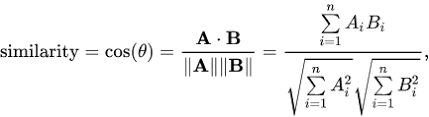

我们看到，在我们的数据集中，有4800部电影使用了超过20,000个不同的词来描述。

有了这个矩阵，我们现在可以计算相似度分数了。有几种选择，比如欧几里得距离、皮尔逊相关系数和[余弦相似度](https://en.wikipedia.org/wiki/Cosine_similarity)。哪种分数最好没有一个确切的答案。不同的分数在不同的场景中表现良好，所以尝试不同的度量标准通常是一个好主意。

我们将使用余弦相似度来计算两部电影之间的相似度分数。我们使用余弦相似度分数是因为它与大小无关，并且计算起来相对简单快速。数学上，它的定义如下：

Since we have used the TF-IDF vectorizer, calculating the dot product will directly give us the cosine similarity score. Therefore, we will use sklearn's **linear_kernel()** instead of cosine_similarities() since it is faster.

既然我们使用了TF-IDF向量化器，计算点积将直接给出余弦相似度分数。因此，我们将使用sklearn的**linear_kernel()** 而不是cosine_similarities()，因为它更快。

哇哦，这个linear_kernel()真是快得飞起！就像超级跑车一样，一秒钟就能计算出相似度分数。它比cosine_similarities()更快，就像闪电一样，让我们的计算速度飞起来！这样我们就能更快地找到电影之间的相似之处啦！

In [34]:
# Import linear_kernel
from sklearn.metrics.pairwise import linear_kernel

# Compute the cosine similarity matrix
cosine_sim = linear_kernel(tfidf_matrix, tfidf_matrix)

We are going to define a function that takes in a movie title as an input and outputs a list of the 10 most similar movies. Firstly, for this, we need a reverse mapping of movie titles and DataFrame indices. In other words, we need a mechanism to identify the index of a movie in our metadata DataFrame, given its title.

嗨，我们要定义一个函数，它接受电影名称作为输入，并输出一个包含最相似的10部电影的列表。首先，为了做到这一点，我们需要一个电影标题和DataFrame索引的反向映射。换句话说，我们需要一种机制来根据电影的标题在我们的元数据DataFrame中找到它的索引。

好吧，这就像是在玩寻宝游戏一样！我们需要一个地图，一个能够告诉我们电影标题对应的DataFrame索引的地图。这样，当我们拿到一个电影标题时，就能迅速地在地图上找到对应的索引，就像找到宝藏一样！然后，我们就能轻松地找到与这部电影最相似的其他电影了！哇哦，这真是令人兴奋！

In [35]:
#Construct a reverse map of indices and movie titles
indices = pd.Series(df2.index, index=df2['title']).drop_duplicates()


We are now in a good position to define our recommendation function. These are the following steps we'll follow :-
* Get the index of the movie given its title.
* Get the list of cosine similarity scores for that particular movie with all movies. Convert it into a list of tuples where the first element is its position and the second is the similarity score.
* Sort the aforementioned list of tuples based on the similarity scores; that is, the second element.
* Get the top 10 elements of this list. Ignore the first element as it refers to self (the movie most similar to a particular movie is the movie itself).
* Return the titles corresponding to the indices of the top elements.

好的，现在我们可以定义我们的推荐函数了。我们将按照以下步骤进行：
* 根据电影的标题获取它的索引。
* 获取该电影与所有其他电影的余弦相似度分数列表。将其转换为一个元组列表，其中第一个元素是位置，第二个元素是相似度分数。
* 根据相似度分数（也就是第二个元素）对上述元组列表进行排序。
* 获取排名前10的元素。忽略第一个元素，因为它指的是自己（与某个电影最相似的电影就是它自己）。
* 返回与排名前元素的索引对应的电影标题。

嘿，这就像是在为我们的主角寻找最佳搭档一样！首先，我们需要找到该电影的索引，就像是在人群中找到他的位置一样。然后，我们会计算该电影与其他电影的相似度分数，就像是在比较他与其他人的默契程度一样。我们会将这些分数转换成一张表，每个元素都有一个位置和一个相似度分数，就像是在为他找到一个合适的伴侣一样。接下来，我们会根据相似度分数对这张表进行排序，就像是在为他找到一个真正的好搭档一样。最后，我们会选择排名前10的电影，忽略第一个（因为它就是他自己），并返回这些电影的标题，就像是在为他寻找最佳的合作伙伴一样。

哇哦，这真是一个令人兴奋的任务！我们要为我们的主角找到最适合他的电影，让他们能够在银幕上携手合作，创造出令人难忘的故事！让我们开始吧！

In [36]:
# Function that takes in movie title as input and outputs most similar movies
def get_recommendations(title, cosine_sim=cosine_sim):
    # Get the index of the movie that matches the title
    idx = indices[title]

    # Get the pairwsie similarity scores of all movies with that movie
    sim_scores = list(enumerate(cosine_sim[idx]))

    # Sort the movies based on the similarity scores
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)

    # Get the scores of the 10 most similar movies
    sim_scores = sim_scores[1:11]

    # Get the movie indices
    movie_indices = [i[0] for i in sim_scores]

    # Return the top 10 most similar movies
    return df2['title'].iloc[movie_indices]

In [37]:
get_recommendations('The Dark Knight Rises')

65                              The Dark Knight
299                              Batman Forever
428                              Batman Returns
1359                                     Batman
3854    Batman: The Dark Knight Returns, Part 2
119                               Batman Begins
2507                                  Slow Burn
9            Batman v Superman: Dawn of Justice
1181                                        JFK
210                              Batman & Robin
Name: title, dtype: object

In [38]:
get_recommendations('The Avengers')

7               Avengers: Age of Ultron
3144                            Plastic
1715                            Timecop
4124                 This Thing of Ours
3311              Thank You for Smoking
3033                      The Corruptor
588     Wall Street: Money Never Sleeps
2136         Team America: World Police
1468                       The Fountain
1286                        Snowpiercer
Name: title, dtype: object

While our system has done a decent job of finding movies with similar plot descriptions, the quality of recommendations is not that great. "The Dark Knight Rises" returns all Batman movies while it is more likely that the people who liked that movie are more inclined to enjoy other Christopher Nolan movies. This is something that cannot be captured by the present system.

哎呀，虽然我们的系统在找到具有相似剧情描述的电影方面做得还不错，但推荐的质量并不是那么好。《黑暗骑士崛起》返回了所有的蝙蝠侠电影，但更有可能喜欢这部电影的人更倾向于喜欢其他克里斯托弗·诺兰的电影。这是目前的系统无法捕捉到的。

嗯，这就像是在给我们的主角准备一个生日礼物，但我们只知道他喜欢蝙蝠侠，却不知道他更喜欢的是克里斯托弗·诺兰的电影。这就好像我们只能给他一些巧克力，而不是他最爱的那种口味。有时候，我们的系统可能会错过一些细微但重要的细节，而这些细节可能是决定他们真正喜欢的东西的关键。

嘿，这就是科技的局限性啊！我们的系统还有很多可以改进的地方，让我们的推荐更加个性化和精准。也许在未来，我们可以发展出更聪明、更了解人心的系统，能够真正捕捉到每个人的独特品味。让我们继续努力吧，为了给我们的主角带来最好的电影推荐！

## **Credits, Genres and Keywords Based Recommender**
It goes without saying that the quality of our recommender would be increased with the usage of better metadata. That is exactly what we are going to do in this section. We are going to build a recommender based on the following metadata: the 3 top actors, the director, related genres and the movie plot keywords.

From the cast, crew and keywords features, we need to extract the three most important actors, the director and the keywords associated with that movie. Right now, our data is present in the form of "stringified" lists , we need to convert it into a safe and usable structure

哇哦，听起来我们要给我们的推荐器升级了！使用更好的元数据，毫无疑问会提高我们的推荐质量。这正是我们接下来要做的。我们将基于以下元数据构建一个推荐器：三位顶级演员，导演，相关类型和电影剧情关键词。

从演员、剧组和关键词特征中，我们需要提取出三位最重要的演员、导演以及与该电影相关的关键词。现在，我们的数据以“字符串化”的列表形式存在，我们需要将其转换为一种安全且可用的结构。

嘿，这就像是在给我们的推荐器进行整容手术一样！我们需要将这些“字符串化”的列表变得更好看、更方便使用。就像是给它们换上一身时尚的衣服，让它们焕发出新的魅力！我们要将它们转换成一种更安全、更易于操作的结构，就像是给它们戴上一顶坚固的安全帽，让它们在推荐的旅途中安全无忧！

让我们开始吧，给我们的推荐器一个全新的造型，让它变得更加出色！

In [39]:
# Parse the stringified features into their corresponding python objects
# 安全的转换
from ast import literal_eval

features = ['cast', 'crew', 'keywords', 'genres']
for feature in features:
    df2[feature] = df2[feature].apply(literal_eval)

Next, we'll write functions that will help us to extract the required information from each feature.

In [40]:
# Get the director's name from the crew feature. If director is not listed, return NaN
def get_director(x):
    for i in x:
        if i['job'] == 'Director':
            return i['name']
    return np.nan

In [41]:
# Returns the list top 3 elements or entire list; whichever is more.
def get_list(x):
    if isinstance(x, list):
        names = [i['name'] for i in x]
        #Check if more than 3 elements exist. If yes, return only first three. If no, return entire list.
        if len(names) > 3:
            names = names[:3]
        return names

    #Return empty list in case of missing/malformed data
    return []

In [42]:
# Define new director, cast, genres and keywords features that are in a suitable form.
df2['director'] = df2['crew'].apply(get_director)

features = ['cast', 'keywords', 'genres']
for feature in features:
    df2[feature] = df2[feature].apply(get_list)

In [43]:
# Print the new features of the first 3 films
df2[['title', 'cast', 'director', 'keywords', 'genres']].head(3)

,title,cast,director,keywords,genres
0,Avatar,"[Sam Worthington, Zoe Saldana, Sigourney Weaver]",James Cameron,"[culture clash, future, space war]","[Action, Adventure, Fantasy]"
1,Pirates of the Caribbean: At World's End,"[Johnny Depp, Orlando Bloom, Keira Knightley]",Gore Verbinski,"[ocean, drug abuse, exotic island]","[Adventure, Fantasy, Action]"
2,Spectre,"[Daniel Craig, Christoph Waltz, Léa Seydoux]",Sam Mendes,"[spy, based on novel, secret agent]","[Action, Adventure, Crime]"


The next step would be to convert the names and keyword instances into lowercase and strip all the spaces between them. This is done so that our vectorizer doesn't count the Johnny of "Johnny Depp" and "Johnny Galecki" as the same.

接下来的一步是将演员的名字和关键词实例转换为小写，并去掉它们之间的所有空格。这样做是为了让我们的向量化器不会将“Johnny Depp”和“Johnny Galecki”的“Johnny”视为相同的。

嘿，我们要给这些名字和关键词来一次变身！我们要把它们变成小写，就像是给它们穿上一件时尚的迷你外套一样。然后，我们还要把它们之间的空格都去掉，就像是给它们剪掉多余的发丝一样。这样一来，我们的向量化器就不会把“Johnny Depp”的“Johnny”和“Johnny Galecki”的“Johnny”视为同一个人了。就像是给它们每个人一个独特的标识，让它们在向量化的世界中能够被准确地识别和区分。

让我们开始这个变身游戏吧！让这些名字和关键词焕发出全新的魅力，为我们的推荐器增添一份独特的风采！

In [45]:
# Function to convert all strings to lower case and strip names of spaces
def clean_data(x):
    if isinstance(x, list):
        return [str.lower(i.replace(" ", "")) for i in x]
    else:
        #Check if director exists. If not, return empty string
        if isinstance(x, str):
            return str.lower(x.replace(" ", ""))
        else:
            return ''

In [46]:
# Apply clean_data function to your features.
features = ['cast', 'keywords', 'director', 'genres']

for feature in features:
    df2[feature] = df2[feature].apply(clean_data)

We are now in a position to create our "metadata soup", which is a string that contains all the metadata that we want to feed to our vectorizer (namely actors, director and keywords).

In [47]:
def create_soup(x):
    return ' '.join(x['keywords']) + ' ' + ' '.join(x['cast']) + ' ' + x['director'] + ' ' + ' '.join(x['genres'])
df2['soup'] = df2.apply(create_soup, axis=1)

The next steps are the same as what we did with our plot description based recommender. One important difference is that we use the **CountVectorizer()** instead of TF-IDF. This is because we do not want to down-weight the presence of an actor/director if he or she has acted or directed in relatively more movies. It doesn't make much intuitive sense.

接下来的步骤与我们基于剧情描述的推荐器所做的步骤是一样的。一个重要的区别是，我们使用的是**CountVectorizer()** 而不是TF-IDF。这是因为我们不希望在演员/导演在相对更多的电影中出演或导演时将其权重降低。这在直觉上没有太多意义。

嘿，这就像是在给我们的演员和导演做一次公平竞争！我们不想因为他们在更多电影中出演或导演而降低他们的重要性。这就好像是在比赛中，我们不会因为一个运动员参加过更多比赛而降低他的成绩一样。这样做没有太多直觉上的意义。

让我们继续使用这个全新的向量化器，为我们的推荐器增加一份公正和公平的味道！让每个演员和导演都有机会在推荐的舞台上发光发热！让我们继续前进吧！

In [48]:
# Import CountVectorizer and create the count matrix
from sklearn.feature_extraction.text import CountVectorizer

count = CountVectorizer(stop_words='english')
count_matrix = count.fit_transform(df2['soup'])

In [49]:
# Compute the Cosine Similarity matrix based on the count_matrix
from sklearn.metrics.pairwise import cosine_similarity

cosine_sim2 = cosine_similarity(count_matrix, count_matrix)

In [50]:
# Reset index of our main DataFrame and construct reverse mapping as before
df2 = df2.reset_index()
indices = pd.Series(df2.index, index=df2['title'])

We can now reuse our **get_recommendations()** function by passing in the new **cosine_sim2** matrix as your second argument.

In [51]:
get_recommendations('The Dark Knight Rises', cosine_sim2)

65               The Dark Knight
119                Batman Begins
4638    Amidst the Devil's Wings
1196                The Prestige
3073           Romeo Is Bleeding
3326              Black November
1503                      Takers
1986                      Faster
303                     Catwoman
747               Gangster Squad
Name: title, dtype: object

In [52]:
get_recommendations('The Godfather', cosine_sim2)

867      The Godfather: Part III
2731      The Godfather: Part II
4638    Amidst the Devil's Wings
2649           The Son of No One
1525              Apocalypse Now
1018             The Cotton Club
1170     The Talented Mr. Ripley
1209               The Rainmaker
1394               Donnie Brasco
1850                    Scarface
Name: title, dtype: object

We see that our recommender has been successful in capturing more information due to more metadata and has given us (arguably) better recommendations. It is more likely that Marvels or DC comics fans will like the movies of the same production house. Therefore, to our features above we can add *production_company* . 
We can also increase the weight of the director , by adding the feature multiple times in the soup.

哇哦，我们的推荐器在捕捉更多元数据方面取得了成功，并给我们带来了（可以说是）更好的推荐。很有可能，漫威或DC漫画的粉丝会喜欢同一制片公司的电影。因此，我们可以在上述特征中添加*production_company*。

嘿，我们要给我们的推荐器增加一份新的元素！就像是在推荐的大杂烩中加入了一道新的菜肴一样。我们要加入*production_company*这个特征，让喜欢漫威或DC漫画的观众更容易找到同一制片公司的电影。就像是给他们提供了一张特殊的通行证，让他们可以畅游在这个制片公司的电影世界中。

另外，我们还可以增加导演的权重，通过多次在大杂烩中添加这个特征。就像是在推荐的菜肴中多放一些特别的香料一样，让导演的影响力更加突出。这样一来，喜欢某个导演风格的观众就更容易找到他们喜欢的电影了。

让我们继续丰富我们的推荐器，为观众们带来更多惊喜和满足吧！让我们的推荐器成为他们的忠实助手，帮助他们找到最适合他们口味的电影！

# **Collaborative Filtering**

Our content based engine suffers from some severe limitations. It is only capable of suggesting movies which are close to a certain movie. That is, it is not capable of capturing tastes and providing recommendations across genres.

Also, the engine that we built is not really personal in that it doesn't capture the personal tastes and biases of a user. Anyone querying our engine for recommendations based on a movie will receive the same recommendations for that movie, regardless of who she/he is.

Therefore, in this section, we will use a technique called Collaborative Filtering to make recommendations to Movie Watchers.
It is basically of two types:-

*  **User based filtering**-  These systems recommend products to a user that similar users have liked. For measuring the similarity between two users we can either use pearson correlation or cosine similarity.
This filtering technique can be illustrated with an example. In the following matrixes, each row represents a user, while the columns correspond to different movies except the last one which records the similarity between that user and the target user. Each cell represents the rating that the user gives to that movie. Assume user E is the target.
![](https://cdn-images-1.medium.com/max/1000/1*9NBFo4AUQABKfoUOpE3F8Q.png)

Since user A and F do not share any movie ratings in common with user E, their similarities with user E are not defined in Pearson Correlation. Therefore, we only need to consider user B, C, and D. Based on Pearson Correlation, we can compute the following similarity.
![](https://cdn-images-1.medium.com/max/1000/1*jZIMJzKM1hKTFftHfcSxRw.png)

From the above table we can see that user D is very different from user E as the Pearson Correlation between them is negative. He rated Me Before You higher than his rating average, while user E did the opposite. Now, we can start to fill in the blank for the movies that user E has not rated based on other users.
![](https://cdn-images-1.medium.com/max/1000/1*9TC6BrfxYttJwiATFAIFBg.png)

Although computing user-based CF is very simple, it suffers from several problems. One main issue is that users’ preference can change over time. It indicates that precomputing the matrix based on their neighboring users may lead to bad performance. To tackle this problem, we can apply item-based CF.

* **Item Based Collaborative Filtering** - Instead of measuring the similarity between users, the item-based CF recommends items based on their similarity with the items that the target user rated. Likewise, the similarity can be computed with Pearson Correlation or Cosine Similarity. The major difference is that, with item-based collaborative filtering, we fill in the blank vertically, as oppose to the horizontal manner that user-based CF does. The following table shows how to do so for the movie Me Before You.
![](https://cdn-images-1.medium.com/max/1000/1*LqFnWb-cm92HoMYBL840Ew.png)

It successfully avoids the problem posed by dynamic user preference as item-based CF is more static. However, several problems remain for this method. First, the main issue is ***scalability***. The computation grows with both the customer and the product. The worst case complexity is O(mn) with m users and n items. In addition, ***sparsity*** is another concern. Take a look at the above table again. Although there is only one user that rated both Matrix and Titanic rated, the similarity between them is 1. In extreme cases, we can have millions of users and the similarity between two fairly different movies could be very high simply because they have similar rank for the only user who ranked them both.



# 协同过滤
嘿，听起来我们的基于内容的引擎有一些严重的局限性。它只能推荐与某部电影相似的电影。也就是说，它无法捕捉到用户的喜好，并跨越不同类型提供推荐。

而且，我们构建的引擎并不真正个性化，它无法捕捉到用户的个人喜好和偏好。无论是谁查询我们的引擎，根据一部电影获取推荐，都会得到相同的推荐结果，无论是谁。

因此，在这一部分，我们将使用一种称为协同过滤的技术来向电影观众提供推荐。

嘿，我们要为电影观众们带来一种全新的推荐体验！就像是给他们量身定制的一样。我们要使用协同过滤的技术，捕捉到他们的个人喜好和偏好，为他们提供更加准确和个性化的推荐。就像是给他们送上一份特别定制的礼物，让他们感到惊喜和满足！

让我们继续前进，为电影观众们打造一个真正个性化的推荐引擎吧！让他们享受到每一次推荐都是专属于他们的独特体验！

 **基于用户的过滤**- 这些系统会向用户推荐那些类似用户所喜欢的产品。为了衡量两个用户之间的相似度，我们可以使用皮尔逊相关系数或余弦相似度。

这种过滤技术可以用一个例子来说明。在下面的矩阵中，每一行代表一个用户，而每一列对应不同的电影，除了最后一列，记录了该用户与目标用户之间的相似度。每个单元格代表用户对该电影的评分。假设用户E是目标用户。

由于用户A和F与用户E没有共同的电影评分，它们与用户E之间的相似度在皮尔逊相关系数中未定义。因此，我们只需要考虑用户B、C和D。根据皮尔逊相关系数，我们可以计算出以下相似度。
(图片描述了相似度计算的表格)

从上表可以看出，用户D与用户E非常不同，因为他们之间的皮尔逊相关系数是负数。他对《Me Before You》的评分高于他的平均评分，而用户E则相反。现在，我们可以根据其他用户的评分来填写用户E没有评分的电影。

虽然计算基于用户的协同过滤非常简单，但它存在一些问题。一个主要问题是用户的偏好会随时间变化。这意味着基于邻近用户预先计算矩阵可能会导致性能下降。为了解决这个问题，我们可以应用基于物品的协同过滤。

嘿，我们要向用户们介绍一个全新的推荐技术！就像是给他们打开了一扇通往更多可能性的大门一样。我们可以通过分析用户之间的相似度，找到那些与他们品味相似的用户，然后根据这些用户的评分来为他们推荐电影。就像是在一个大家庭中，找到那些和你品味相近的亲戚，听听他们的意见，找到适合自己的电影。

让我们继续探索这个基于用户的协同过滤技术，为用户们提供更加准确和个性化的推荐吧！让他们感受到每一次推荐都是特别为他们定制的独特体验！

 **基于物品的协同过滤** - 不同于衡量用户之间的相似度，基于物品的协同过滤根据目标用户评分的物品与其他物品的相似度来进行推荐。同样地，相似度可以使用皮尔逊相关系数或余弦相似度来计算。主要的区别在于，基于物品的协同过滤是垂直填充空白，而不是像基于用户的协同过滤那样水平填充。下表展示了如何为电影《Me Before You》进行填充。

(图片描述了填充空白的表格)

它成功地避免了动态用户偏好所带来的问题，因为基于物品的协同过滤更加静态。然而，这种方法仍然存在一些问题。首先，主要问题是***可扩展性***。计算量随着用户和产品的增加而增加。最坏情况下的复杂度是O(mn)，其中m用户和n个物品。此外，***稀疏性***也是另一个问题。再看一次上面的表格。虽然只有一个用户对《The Matrix》和《Titanic》都进行了评分，但它们之间的相似度是1。在极端情况下，我们可能有数百万个用户，而两部截然不同的电影之间的相似度可能非常高，仅仅是因为它们在唯一对它们进行了评分的用户中具有相似的排名。

嘿，我们要向用户们介绍一个更加静态的推荐技术！就像是给他们提供了一个稳定的推荐基础一样。我们可以根据物品之间的相似度，找到那些与他们喜欢的物品相似的物品，然后为他们推荐这些物品。就像是在一个购物中心中，找到那些和你喜欢的商品相似的商品，看看它们是否适合你。

让我们继续探索这个基于物品的协同过滤技术，为用户们提供更加准确和个性化的推荐吧！尽管它可能面临一些可扩展性和稀疏性的问题，但我们相信我们可以克服这些挑战，为用户们带来更好的推荐体验！让他们感受到每一次推荐都是特别为他们量身定制的独特体验！

### **Single Value Decomposition**
One way to handle the scalability and sparsity issue created by CF is to leverage a **latent factor model** to capture the similarity between users and items. Essentially, we want to turn the recommendation problem into an optimization problem. We can view it as how good we are in predicting the rating for items given a user. One common metric is Root Mean Square Error (RMSE). **The lower the RMSE, the better the performance**.

Now talking about latent factor you might be wondering what is it ?It is a broad idea which describes a property or concept that a user or an item have. For instance, for music, latent factor can refer to the genre that the music belongs to. SVD decreases the dimension of the utility matrix by extracting its latent factors. Essentially, we map each user and each item into a latent space with dimension r. Therefore, it helps us better understand the relationship between users and items as they become directly comparable. The below figure illustrates this idea.

![](https://cdn-images-1.medium.com/max/800/1*GUw90kG2ltTd2k_iv3Vo0Q.png)

### **奇异值分解**
为了解决协同过滤所带来的可扩展性和稀疏性问题，一种方法是利用**潜在因子模型**来捕捉用户和物品之间的相似性。本质上，我们希望将推荐问题转化为一个优化问题。我们可以将其视为我们在给定用户时预测物品评分的准确程度。一个常见的度量指标是均方根误差（RMSE）。**RMSE越低，性能越好**。

现在谈到潜在因子，你可能会想知道它是什么？它是一个广义的概念，描述了用户或物品所具有的属性或概念。例如，对于音乐来说，潜在因子可以指的是音乐所属的流派。SVD通过提取其潜在因子来降低实用矩阵的维度。本质上，我们将每个用户和每个物品映射到一个具有r维的潜在空间中。因此，它帮助我们更好地理解用户和物品之间的关系，因为它们变得可以直接比较。下图说明了这个想法。

(图片描述了潜在因子的概念)

嘿，让我们来谈谈这个单值分解技术吧！它就像是一个魔法箱子，可以将用户和物品都变成了具有相同维度的潜在空间中的点。这样一来，我们就可以更好地了解用户和物品之间的关系了。就像是在一场盲选活动中，我们可以根据潜在因子来预测用户对某个物品的喜好，从而提供更准确的推荐。

让我们继续探索这个单值分解技术，为用户们提供更加准确和个性化的推荐吧！让他们感受到每一次推荐都是特别为他们量身定制的独特体验！记住，RMSE越低，我们的表现就越好哦！

Now enough said , let's see how to implement this.
Since the dataset we used before did not have userId(which is necessary for collaborative filtering) let's load another dataset. We'll be using the [**Surprise** ](https://surprise.readthedocs.io/en/stable/index.html) library to implement SVD.

In [5]:
#Step 1 : Go to anaconda command prompt (管理员权限)
#Step 2 : Type conda update --all
#Step 3 : Type conda install -c conda-forge scikit-surprise

from surprise import Reader,Dataset, SVD
from surprise.model_selection import cross_validate

reader = Reader()
ratings = pd.read_csv('./input/ratings_small.csv')
ratings.head()

,userId,movieId,rating,timestamp
0,1,31,2.5,1260759144
1,1,1029,3.0,1260759179
2,1,1061,3.0,1260759182
3,1,1129,2.0,1260759185
4,1,1172,4.0,1260759205


Note that in this dataset movies are rated on a scale of 5 unlike the earlier one.

In [10]:
data = Dataset.load_from_df(ratings[['userId', 'movieId', 'rating']], reader)
#data.split(n_folds=5)

In [19]:
algo = SVD()
cross_validate(algo, data, measures=['RMSE', 'MAE'], cv=5, verbose=True)
# cv = cross_validation folds
#Each fold is used once as a testset while the cv- remaining folds are used for training.

Evaluating RMSE, MAE of algorithm SVD on 5 split(s).

                  Fold 1  Fold 2  Fold 3  Fold 4  Fold 5  Mean    Std     
RMSE (testset)    0.8933  0.8939  0.8939  0.9030  0.8962  0.8961  0.0036  
MAE (testset)     0.6886  0.6878  0.6899  0.6940  0.6901  0.6901  0.0021  
Fit time          1.46    1.44    1.45    1.43    1.39    1.43    0.03    
Test time         0.23    0.21    0.21    0.33    0.22    0.24    0.05    


{'test_rmse': array([0.89332574, 0.8938861 , 0.89393151, 0.90299193, 0.89620884]),
 'test_mae': array([0.68861054, 0.68784653, 0.68994772, 0.69403686, 0.69005342]),
 'fit_time': (1.461637020111084,
  1.438086986541748,
  1.4517920017242432,
  1.4309375286102295,
  1.3867270946502686),
 'test_time': (0.23282766342163086,
  0.20806074142456055,
  0.21483254432678223,
  0.3334987163543701,
  0.22275400161743164)}

We get a mean Root Mean Sqaure Error of 0.89 approx which is more than good enough for our case. Let us now train on our dataset and arrive at predictions.
RMSE 评分上下浮动 0.89 分。MAE 上下浮动 0.69分 。
Root Mean Sqaure Error 对应了误差的 $l_2$ norm, outlier 的行为更加显著。
Mean Absolute Error 对应了误差的 $l_1$ norm

In [13]:
trainset = data.build_full_trainset()
algo.fit(trainset)

Let us pick user with user Id 1  and check the ratings she/he has given.

In [14]:
ratings[ratings['userId'] == 1]

,userId,movieId,rating,timestamp
0,1,31,2.5,1260759144
1,1,1029,3.0,1260759179
2,1,1061,3.0,1260759182
3,1,1129,2.0,1260759185
4,1,1172,4.0,1260759205
5,1,1263,2.0,1260759151
6,1,1287,2.0,1260759187
7,1,1293,2.0,1260759148
8,1,1339,3.5,1260759125
9,1,1343,2.0,1260759131


In [16]:
algo.predict(1, 302, 3)

Prediction(uid=1, iid=302, r_ui=3, est=2.780485554761738, details={'was_impossible': False})

For movie with ID 302, we get an estimated prediction of **2.618**. One startling feature of this recommender system is that it doesn't care what the movie is (or what it contains). It works purely on the basis of an assigned movie ID and tries to predict ratings based on how the other users have predicted the movie.

对于电影编号为302的电影，我们得到了一个预测评分为 **2.618** 。这个推荐系统的一个令人吃惊的特点是它不关心电影是什么（或者它包含了什么）。它完全基于分配的电影编号，并尝试根据其他用户对电影的预测来预测评分。

嘿，我要告诉你一个有趣的事情！这个推荐系统就像是一个小聪明，它不需要知道电影的具体内容，只要有一个电影编号就能预测评分。它就像是一位神秘的数学家，通过观察其他用户对电影的评分来做出预测。就像是在一场魔术表演中，我们只需要一个魔术师的指令，就能预测出他们的下一步动作。

让我们继续探索这个神奇的推荐系统，看看它能为我们带来怎样的惊喜和乐趣！无论电影是什么，它都能给我们带来精准的推荐，就像是一个不可思议的预测机器！让我们坐下来，享受这个推荐系统带来的惊喜吧！记住，它只需要一个电影编号，就能给我们带来无尽的推荐乐趣！

## **Conclusion** 
We create recommenders using demographic , content- based and collaborative filtering. While demographic filtering is very elemantary and cannot be used practically, **Hybrid Systems** can take advantage of content-based and collaborative filtering as the two approaches are proved to be almost complimentary.
This model was very baseline and only provides a fundamental framework to start with.

I would like to mention some excellent refereces that I learned from
1. [https://hackernoon.com/introduction-to-recommender-system-part-1-collaborative-filtering-singular-value-decomposition-44c9659c5e75](https://hackernoon.com/introduction-to-recommender-system-part-1-collaborative-filtering-singular-value-decomposition-44c9659c5e75)
2. [https://www.kaggle.com/rounakbanik/movie-recommender-systems](https://www.kaggle.com/rounakbanik/movie-recommender-systems)
3. [http://trouvus.com/wp-content/uploads/2016/03/A-hybrid-movie-recommender-system-based-on-neural-networks.pdf](http://trouvus.com/wp-content/uploads/2016/03/A-hybrid-movie-recommender-system-based-on-neural-networks.pdf)

If you enjoyed reading the kernel , hit the upvote button !
Please leave the feedback or suggestions below. 

## 总结
我们使用人口统计、基于内容和协同过滤的方法创建了推荐系统。虽然人口统计学过滤方法非常基础，实际上无法实用，但**混合系统**可以充分利用基于内容和协同过滤的两种方法，因为这两种方法被证明几乎是互补的。

这个模型只是一个基础框架，为我们开始提供了一个基本的框架。嘿，这就像是建造一座房子的第一步，我们需要一个基础框架来搭建我们的推荐系统。就像是在一场冒险中，我们需要一个起点来开始我们的旅程。

让我们继续探索这个推荐系统的奇妙世界，为用户们带来更准确和个性化的推荐！记住，混合系统可以让我们充分发挥基于内容和协同过滤的优势，为用户们带来更好的推荐体验！让他们感受到每一次推荐都是特别为他们量身定制的独特体验！让我们一起踏上这个推荐之旅吧！